# Raw Data Cleaning

In [20]:
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

In [2]:
exp100=sc.read_10x_h5('Input/sec-seq_data/GSE229042_filtered_feature_bc_matrix_100.h5',gex_only=False)
exp105=sc.read_10x_h5('Input/sec-seq_data/GSE229042_filtered_feature_bc_matrix_105.h5',gex_only=False)
exp106=sc.read_10x_h5('Input/sec-seq_data/GSE229042_filtered_feature_bc_matrix_106.h5',gex_only=False)

/Users/pablodigiusto/miniforge3/envs/secrecon/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/pablodigiusto/miniforge3/envs/secrecon/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/pablodigiusto/miniforge3/envs/secrecon/lib/python3.11/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [3]:
exp100.var_names_make_unique()
exp105.var_names_make_unique()
exp106.var_names_make_unique()

In [4]:
exp100

AnnData object with n_obs × n_vars = 4630 × 36692
    var: 'gene_ids', 'feature_types', 'genome'

In [5]:
# Exp100
sc.pp.filter_cells(exp100, min_genes=700) # Remove cells that have less than 700 genes expressed
# sc.pp.filter_genes(exp100, min_cells=3)
exp100.var['mt'] = exp100.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(exp100, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True) # QC

In [6]:
# Exp105
sc.pp.filter_cells(exp105, min_genes=500)
# sc.pp.filter_genes(exp100, min_cells=3)
exp105.var['mt'] = exp105.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(exp105, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [7]:
# Exp106
sc.pp.filter_cells(exp106, min_genes=1000)
# sc.pp.filter_genes(exp100, min_cells=3)
exp106.var['mt'] = exp106.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(exp106, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

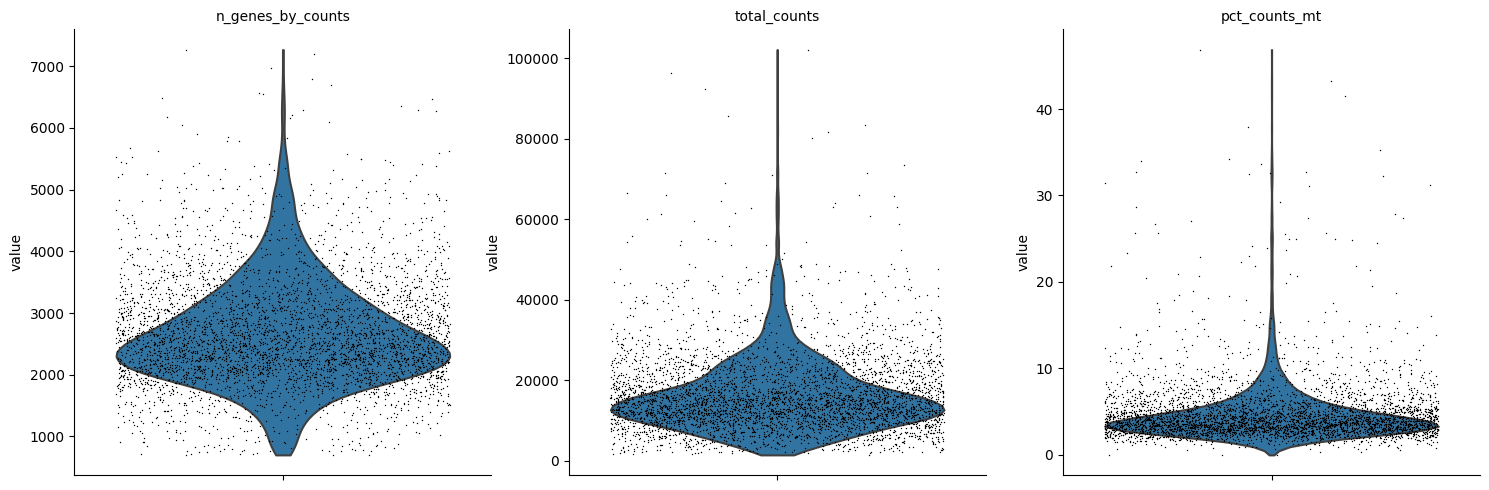

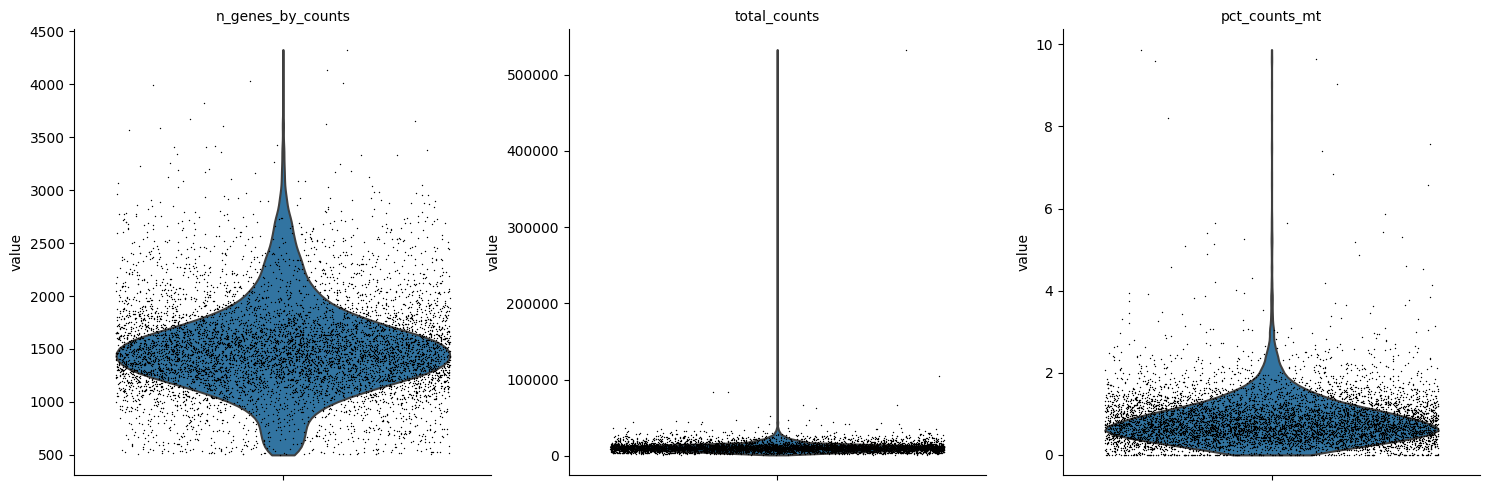

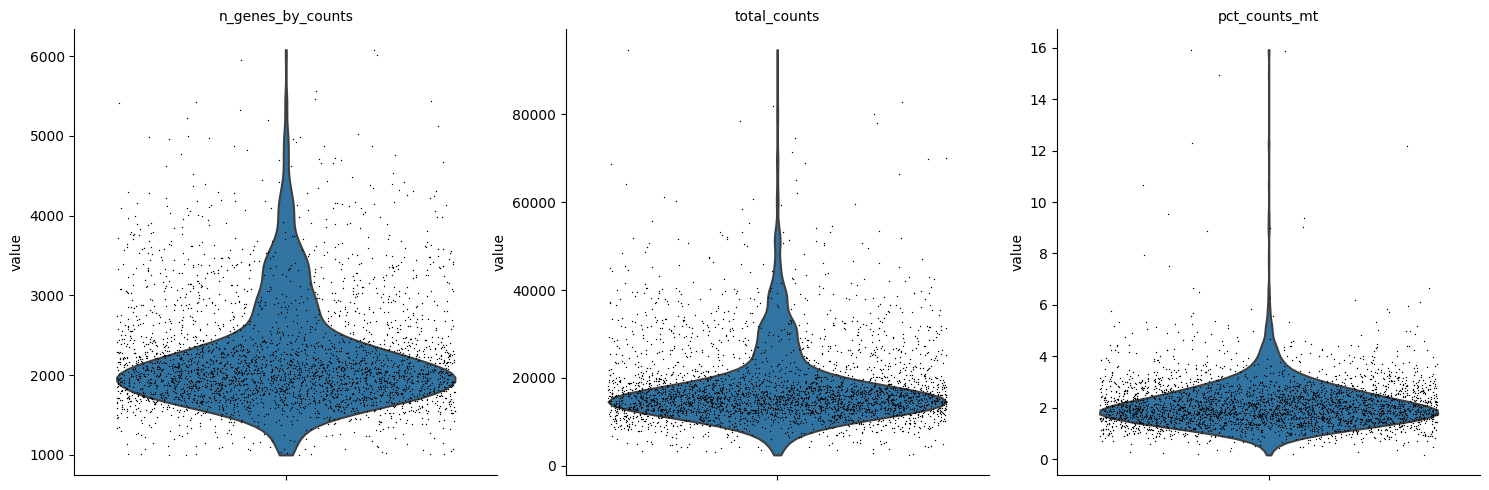

In [8]:
sc.pl.violin(exp100, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], # 'pct_counts_mt': percentage of counts in mitochondrial genes
             jitter=0.4, multi_panel=True)
sc.pl.violin(exp105, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
sc.pl.violin(exp106, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

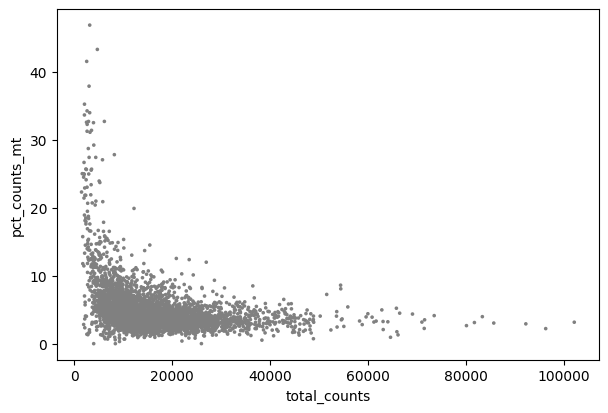

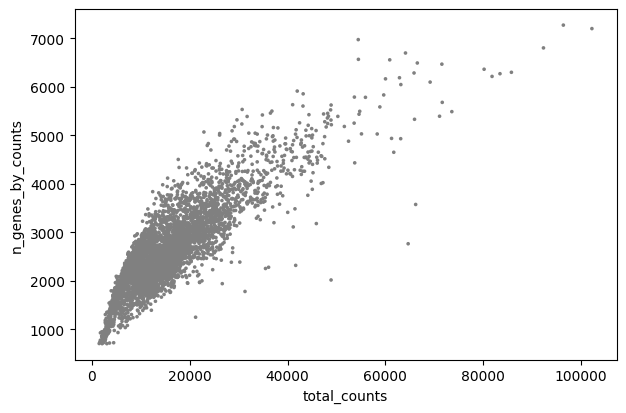

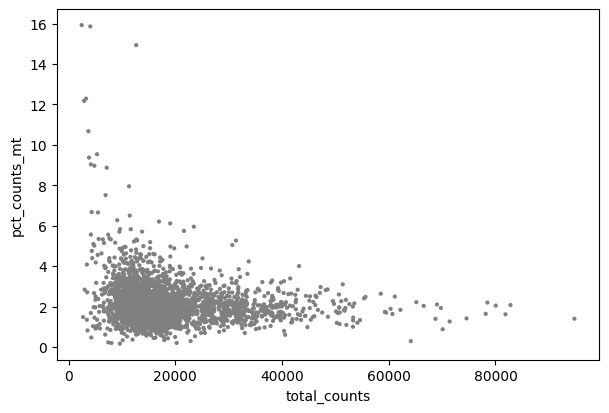

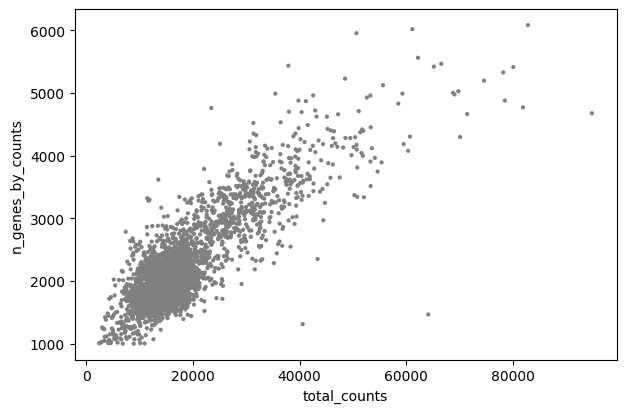

In [9]:
sc.pl.scatter(exp100, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(exp100, x='total_counts', y='n_genes_by_counts')

sc.pl.scatter(exp106, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(exp106, x='total_counts', y='n_genes_by_counts')

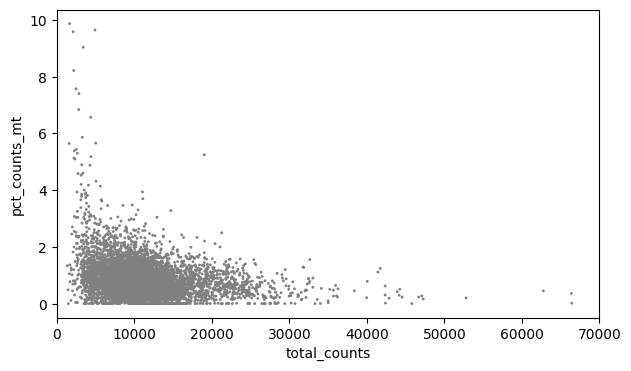

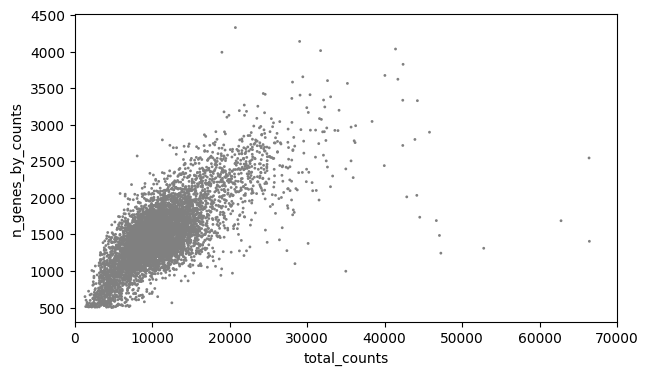

In [10]:
with rc_context({'figure.figsize': (7, 4)}):
    fig, ax = plt.subplots()
    ax.set_xlim(0,70000)

    sc.pl.scatter(exp105, x='total_counts', y='pct_counts_mt',ax=ax)
#     sc.pl.scatter(exp100, x='IgG_ADT', y='MT-CO1',ax=ax)
with rc_context({'figure.figsize': (7, 4)}):
    fig, ax = plt.subplots()
    ax.set_xlim(0,70000)

    sc.pl.scatter(exp105, x='total_counts', y='n_genes_by_counts',ax=ax)

In [11]:
exp100 = exp100[exp100.obs.total_counts < 50000, :]
exp100 = exp100[exp100.obs.pct_counts_mt < 10, :]
exp105 = exp105[exp105.obs.total_counts < 35000, :]
exp105 = exp105[exp105.obs.pct_counts_mt < 2.5, :]
exp106 = exp106[exp106.obs.total_counts < 50000, :]
exp106 = exp106[exp106.obs.pct_counts_mt < 5, :]

In [12]:
exp100,exp105,exp106

(View of AnnData object with n_obs × n_vars = 4140 × 36692
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 7157 × 36698
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 3155 × 36692
     obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts')

In [13]:
exp100_=exp100.copy()
exp105_=exp105.copy()
exp106_=exp106.copy()

In [14]:
exp100_ = exp100_[(exp100_.obs_vector('IgG_ADT') <2000), :]
exp106_ = exp106_[(exp106_.obs_vector('IgG_ADT') <2000), :]
exp105_ = exp105_[(exp105_.obs_vector('IgG_ADT') <350), :]
#exp105 has other cell surface tag, IgG_ADT compromised, lower then exp100 and exp106

In [15]:
exp100_.layers["counts"] = exp100_.X.copy()

exp105_.layers["counts"] = exp105_.X.copy()

exp106_.layers["counts"] = exp106_.X.copy()
# sc.pp.filter_genes(exp106_, min_counts=0) #first analysis

In [16]:
rna=exp106_
u=np.exp(1)

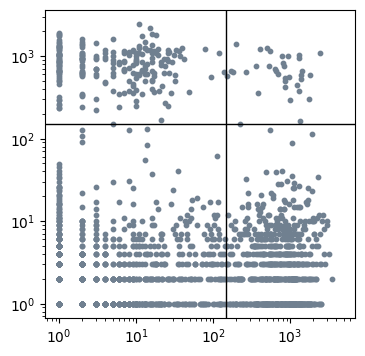

In [17]:
x='IGHM'
y='IGHA1' 
fig=plt.figure(figsize=(4,4)) 
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10) 
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=u**5,linewidth=1, c='k') 
plt.axhline(y=u**5,linewidth=1, c='k')

In [18]:
#exp106
#cleanup doublet, we do this manually and observe the distribution simultaneously
#heavy chain isotype should be exclusive #IgM # IgA
m=u**5
a1=u**5
a2=u**3
g1=u**3.5
g2=u**3.5
g3=u**3.5
g4=u**2.5
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA1') > a1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA2') > a2))] 

rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG4') > g4))] 

rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG4') > g4))] 

rna=rna[~((rna.obs_vector('IGHA2') > a2) & (rna.obs_vector('IGHG1') > g1))] 

# #heavy chain isotype should be exclusive #IgG 
rna=rna[~((rna.obs_vector('IGHG1') > u**5) & (rna.obs_vector('IGHG2') > u**4))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**5) & (rna.obs_vector('IGHG3') > u**3.6))] 

# #IGHG1 has linear plot likely conserve region

# # #light chain isotype should be exclusive
k=u**6.5
l1=u**6.5
l2=u**6.5
l3=u**6.5
rna=rna[~((rna.obs_vector('IGKC') >k) & (rna.obs_vector('IGLC1') > l1))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC3') > l3))] 

rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC3') > l3))] 

# #IGLC2 and IGLC3 has linear plot likely conserve region
rna.write('exp106.h5')

PearsonRResult(statistic=0.25393788022002917, pvalue=1.0085494752126786e-40)
PearsonRResult(statistic=-0.11313365550231887, pvalue=4.253729140284648e-09)


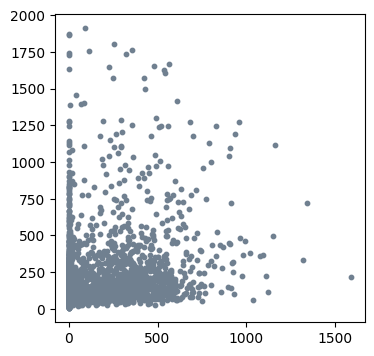

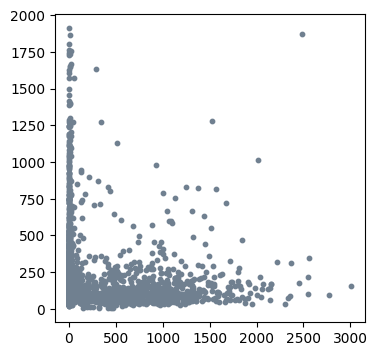

In [21]:
x='IGHG1'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print (pearsonr(rna.obs_vector(x),rna.obs_vector(y)))
x='IGHM'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print(pearsonr(rna.obs_vector(x),rna.obs_vector(y)))

In [22]:
rna=exp105_
rna

AnnData object with n_obs × n_vars = 7090 × 36698
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    layers: 'counts'

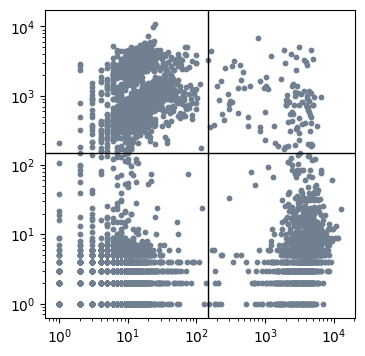

In [23]:
x='IGLC1'
y='IGLC3' 
fig=plt.figure(figsize=(4,4)) 
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10) 
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=u**5,linewidth=1, c='k') 
plt.axhline(y=u**5,linewidth=1, c='k')

In [26]:
#exp105
#cleanup doublet, we do this manually and observe the distribution simultaneously
#heavy chain isotype should be exclusive #IgM # IgA

m=u**4.5
a1=u**4
a2=u**2
g1=u**3
g2=u**3
g3=u**5
g4=u**3.5
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA1') > a1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG4') > g4))] 

rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG4') > g4))] 


# #heavy chain isotype should be exclusive #IgG 
rna=rna[~((rna.obs_vector('IGHG1') > u**5.3) & (rna.obs_vector('IGHG2') > u**3.5))] 
rna=rna[~((rna.obs_vector('IGHG1') > u**3) & (rna.obs_vector('IGHG3') > u**5.5))] 
rna=rna[~((rna.obs_vector('IGHG1') > u**3) & (rna.obs_vector('IGHG4') > u**3.5))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**3.5) & (rna.obs_vector('IGHG3') > u**3.5))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**3.5) & (rna.obs_vector('IGHG4') > u**3.5))] 
rna=rna[~((rna.obs_vector('IGHG3') > u**3.5) & (rna.obs_vector('IGHG4') > u**3.5))] 

# # #IGHG1 has linear plot likely conserve region

# # #light chain isotype should be exclusive
k=u**6
l1=u**6
l2=u**6
l3=u**5
rna=rna[~((rna.obs_vector('IGKC') >k) & (rna.obs_vector('IGLC1') > l1))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC3') > l3))] 

rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC3') > l3))] 

#IGLC2 and IGLC3 has linear plot likely conserve region
rna.write('exp105.h5')

PearsonRResult(statistic=0.14482225959312625, pvalue=2.119038437708492e-31)
PearsonRResult(statistic=-0.0715585073867132, pvalue=9.652211498887745e-09)


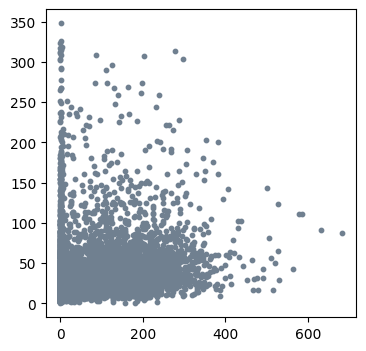

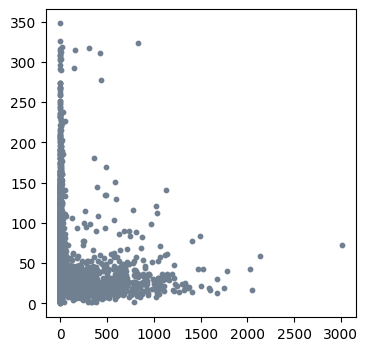

In [27]:
x='IGHG1'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print (pearsonr(rna.obs_vector(x),rna.obs_vector(y)))
x='IGHM'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print(pearsonr(rna.obs_vector(x),rna.obs_vector(y)))

In [28]:
rna=exp100_
rna

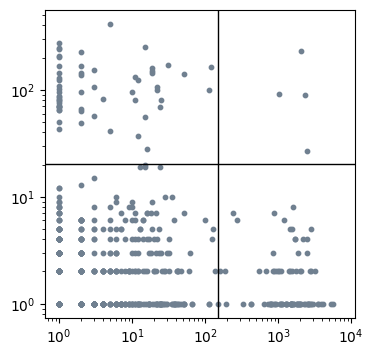

In [30]:
x='IGHM'
y='IGHA2' 
fig=plt.figure(figsize=(4,4)) 
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10) 
plt.xscale('log')
plt.yscale('log')
plt.axvline(x=u**5,linewidth=1, c='k') 
plt.axhline(y=u**3,linewidth=1, c='k')

In [31]:
#exp100
#cleanup doublet, we do this manually and observe the distribution simultaneously
#heavy chain isotype should be exclusive #IgM # IgA

m=u**5
a1=u**5
a2=u**3
g1=u**4.5
g2=u**4.5
g3=u**6
g4=u**5

rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA1') > a1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHA2') > a2))] 

rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHM') > m) & (rna.obs_vector('IGHG4') > g4))] 

rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG1') > g1))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG2') > g2))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG3') > g3))] 
rna=rna[~((rna.obs_vector('IGHA1') > a1) & (rna.obs_vector('IGHG4') > g4))] 


# # #heavy chain isotype should be exclusive #IgG 
rna=rna[~((rna.obs_vector('IGHG1') > u**5) & (rna.obs_vector('IGHG2') > u**4.5))] 
rna=rna[~((rna.obs_vector('IGHG1') > u**5) & (rna.obs_vector('IGHG3') > u**6))] 
rna=rna[~((rna.obs_vector('IGHG1') > u**5) & (rna.obs_vector('IGHG4') > u**4.5))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**4.5) & (rna.obs_vector('IGHG3') > u**4.5))] 
rna=rna[~((rna.obs_vector('IGHG2') > u**4.5) & (rna.obs_vector('IGHG4') > u**5))] 
rna=rna[~((rna.obs_vector('IGHG3') > u**4.5) & (rna.obs_vector('IGHG4') > u**5))] 

# # # #IGHG1 has linear plot likely conserve region

# # # #light chain isotype should be exclusive
k=u**7
l1=u**6
l2=u**6
l3=u**6
rna=rna[~((rna.obs_vector('IGKC') >k) & (rna.obs_vector('IGLC1') > l1))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGKC') > k) & (rna.obs_vector('IGLC3') > l3))] 

rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC2') > l2))] 
rna=rna[~((rna.obs_vector('IGLC1') > l1) & (rna.obs_vector('IGLC3') > l3))] 

# #IGLC2 and IGLC3 has linear plot likely conserve region
rna.write('exp100.h5')

PearsonRResult(statistic=0.16684789155450172, pvalue=4.1093941810348015e-25)
PearsonRResult(statistic=-0.07740654966443111, pvalue=1.788155695684445e-06)


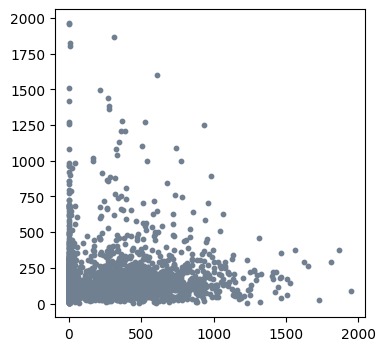

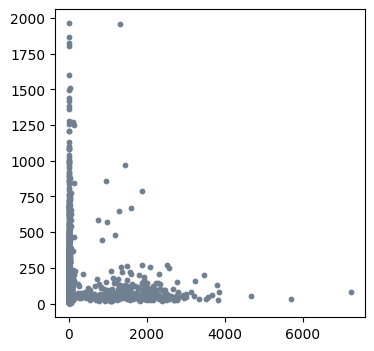

In [33]:
x='IGHG1'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print (pearsonr(rna.obs_vector(x),rna.obs_vector(y)))
x='IGHM'
y='IgG_ADT'
fig=plt.figure(figsize=(4,4))
plt.scatter(rna.obs_vector(x),rna.obs_vector(y),label="IG",color='slategrey',s=10)
# plt.axvline(x=6.5,linewidth=1, c='k')
# plt.axhline(y=6,linewidth=1, c='k')
print(pearsonr(rna.obs_vector(x),rna.obs_vector(y)))